# 4. Ridge regression

__Sine curve data set__

In [3]:
import pandas as pd

# Load the training data
training_data = pd.read_csv("c3_data-points.csv")

# Print shape
print("Shape:", training_data.shape)

Shape: (50, 2)


In [4]:
# First five rows
training_data.head()

,x,y
0,0.000,0.706
1,0.128,0.288
2,0.256,0.645
3,0.385,1.272
4,0.513,1.238


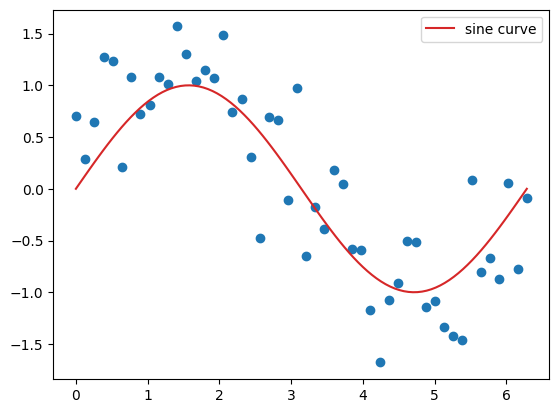

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Extract x, y data
x = training_data.x.values
y = training_data.y.values

# Plot data points
plt.scatter(x, y)

# Plot sine curve for reference
x_values = np.linspace(min(x), max(x), num=100)
y_sine = np.sin(x_values)
plt.plot(x_values, y_sine, c="C3", label="sine curve")
plt.legend()
plt.show()

__Polynomial regression__

In [6]:
from sklearn.preprocessing import PolynomialFeatures

# Create the polynomial features
poly_obj = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_obj.fit_transform(x[:, np.newaxis])

print("Shape:", X_poly.shape)
print("Features:", poly_obj.get_feature_names_out())

Shape: (50, 10)
Features: ['x0' 'x0^2' 'x0^3' 'x0^4' 'x0^5' 'x0^6' 'x0^7' 'x0^8' 'x0^9' 'x0^10']


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_rescaled = scaler.fit_transform(X_poly)

In [15]:
X_rescaled.mean(axis=0)

array([ 1.77635684e-16,  2.66453526e-16, -1.68753900e-16, -8.88178420e-18,
       -7.99360578e-17,  8.88178420e-18, -1.77635684e-17, -1.77635684e-17,
        4.44089210e-17,  1.06581410e-16])

In [16]:
X_rescaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [17]:
from sklearn.linear_model import LinearRegression

# Linear regression
lr = LinearRegression()
lr.fit(X_rescaled, y)

# Pass sample x values through the preprocessing steps
X_values_rescaled = scaler.transform(poly_obj.transform(x_values[:, np.newaxis]))
y_values_lr = lr.predict(X_values_rescaled)

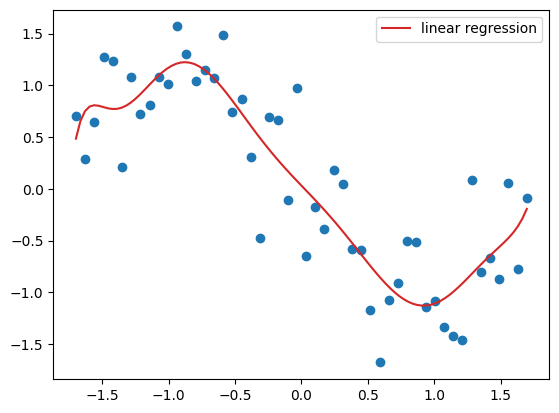

In [18]:
# Plot the model
plt.scatter(X_rescaled[:, 0], y)
plt.plot(X_values_rescaled[:, 0], y_values_lr, c="C3", label="linear regression")
plt.legend()
plt.show()

__Ridge regression__

In [19]:
from sklearn.linear_model import Ridge

# Ridge regression
ridge = Ridge()
ridge.fit(X_rescaled, y)

# Compute predictions
y_values_ridge = ridge.predict(X_values_rescaled)

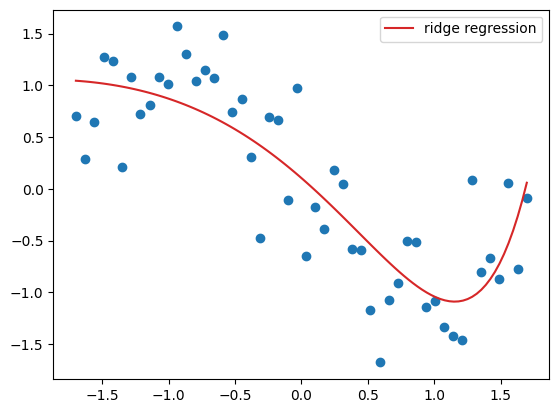

In [20]:
# Plot the model
plt.scatter(X_rescaled[:, 0], y)
plt.plot(X_values_rescaled[:, 0], y_values_ridge, c="C3", label="ridge regression")
plt.legend()
plt.show()

In [21]:
# Ridge regression
ridge2 = Ridge(alpha=1e-4)
ridge2.fit(X_rescaled, y)

# Compute predictions
y_values_ridge2 = ridge2.predict(X_values_rescaled)

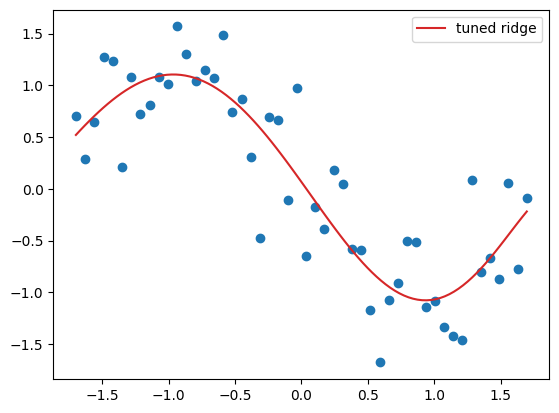

In [22]:
plt.scatter(X_rescaled[:, 0], y)
plt.plot(X_values_rescaled[:, 0], y_values_ridge2, c="C3", label="tuned ridge")
plt.legend()
plt.show()

In [23]:
# Linear regression coefficients
features = poly_obj.get_feature_names_out()
for feature, coef in zip(features, lr.coef_):
    print("{:<6}: {:>10.1f}".format(feature, coef))

x0    :        6.3
x0^2  :     -156.5
x0^3  :     1604.8
x0^4  :    -8250.8
x0^5  :    24145.5
x0^6  :   -42951.3
x0^7  :    47245.0
x0^8  :   -31285.6
x0^9  :    11373.1
x0^10 :    -1731.0


In [24]:
# Ridge regression coefficients
for feature, coef in zip(features, ridge2.coef_):
    print("{:<6}: {:>4.1f}".format(feature, coef))

x0    :  1.4
x0^2  : -1.6
x0^3  : -6.8
x0^4  :  3.9
x0^5  :  4.5
x0^6  :  0.5
x0^7  : -1.7
x0^8  : -1.1
x0^9  :  0.2
x0^10 :  0.1


__Lasso regressions__

In [26]:
from sklearn.linear_model import Lasso

# Lasso regression
lasso = Lasso(alpha=1e-4, max_iter=int(1e5))
lasso.fit(X_rescaled, y)

# Compute predictions
y_values_lasso = lasso.predict(X_values_rescaled)

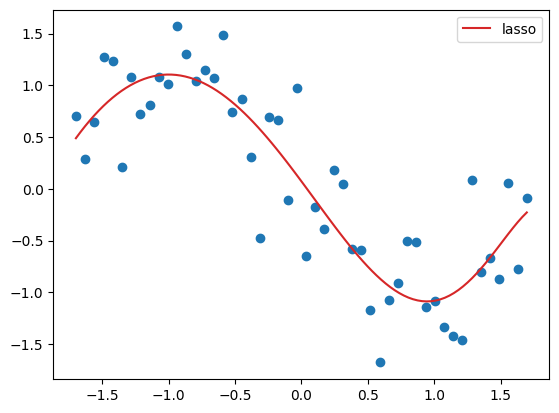

In [27]:
# Plot the model
plt.scatter(X_rescaled[:, 0], y)
plt.plot(X_values_rescaled[:, 0], y_values_lasso, c="C3", label="lasso")
plt.legend()
plt.show()

In [28]:
# Lasso regression coefficients
for feature, coef in zip(features, lasso.coef_):
    print("{:<6}: {:>4.1f}".format(feature, coef))

x0    :  1.8
x0^2  : -4.4
x0^3  : -0.2
x0^4  :  0.0
x0^5  :  2.2
x0^6  :  0.9
x0^7  :  0.0
x0^8  :  0.0
x0^9  : -0.0
x0^10 : -0.7


# 5. Tuning hyperparameters with grid search

__House prices data set__

In [2]:
import pandas as pd

# Load the data
data_df = pd.read_csv("c3_house-prices.csv")
data_df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,484,528275070,60,RL,NaN,8795,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,236000
1,2586,535305120,20,RL,75.0,10170,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,155000
2,2289,923228250,160,RM,21.0,2001,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,75000
3,142,535152150,20,RL,70.0,10552,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,165500
4,2042,903475060,190,RM,60.0,10120,Pave,NaN,IR1,Bnk,...,0,NaN,MnPrv,NaN,0,1,2007,WD,Normal,122000


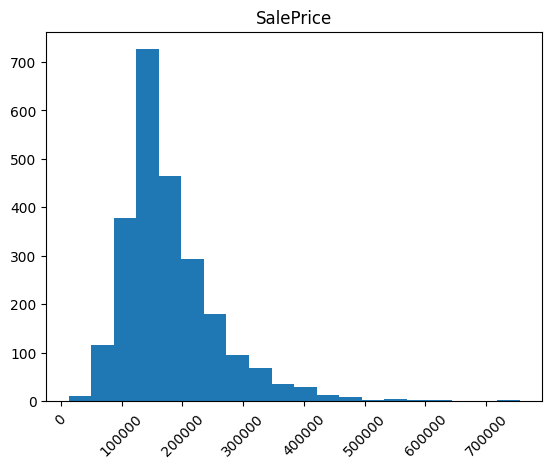

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

data_df.hist(column="SalePrice", bins=20, grid=False, xrot=45)
plt.show()

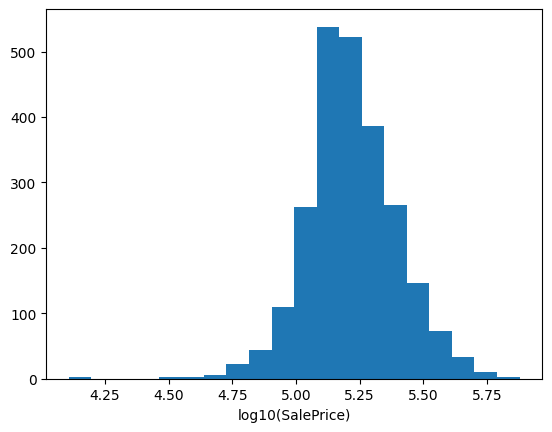

In [4]:
import numpy as np

plt.hist(np.log10(data_df.SalePrice), bins=20)
plt.xlabel("log10(SalePrice)")
plt.show()

__Preprocessing the data__

In [5]:
def preprocess(df):
    # Work on a copy
    df = df.copy()

    # One-hot encoding
    df = pd.get_dummies(df, dummy_na=True)

    # Fill missing values
    for c in df.columns:
        df[c] = df[c].fillna(df[c].median())

    return df


preprocessed_df = preprocess(data_df)
preprocessed_df.head()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_VWD,Sale Type_WD,Sale Type_nan,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial,Sale Condition_nan
0,484,528275070,60,68.0,8795,7,5,2000,2000,0.0,...,False,True,False,False,False,False,False,True,False,False
1,2586,535305120,20,75.0,10170,6,6,1951,1951,522.0,...,False,True,False,False,False,False,False,True,False,False
2,2289,923228250,160,21.0,2001,4,5,1970,1970,80.0,...,False,True,False,False,False,False,False,True,False,False
3,142,535152150,20,70.0,10552,5,5,1959,1959,0.0,...,False,True,False,False,False,False,False,True,False,False
4,2042,903475060,190,60.0,10120,7,4,1910,1950,0.0,...,False,True,False,False,False,False,False,True,False,False


In [6]:
from sklearn.model_selection import train_test_split

# Create X, y
X = preprocessed_df.drop("SalePrice", axis=1).values
y = np.log10(preprocessed_df.SalePrice).values

# Split into train/validation sets
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.5, random_state=0)

print("Train:", X_tr.shape, y_tr.shape)
print("Validation:", X_val.shape, y_val.shape)

Train: (1215, 346) (1215,)
Validation: (1215, 346) (1215,)


In [7]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_tr_rescaled = scaler.fit_transform(X_tr)
X_val_rescaled = scaler.transform(X_val)

__Linear regression__

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE

# Try with a linear regression
lr = LinearRegression()
lr.fit(X_tr_rescaled, y_tr)

print("Train MSE: {:.4f}".format(MSE(y_tr, lr.predict(X_tr_rescaled))))
print("Validation MSE: {:.4f}".format(MSE(y_val, lr.predict(X_val_rescaled))))

Train MSE: 0.0014
Validation MSE: 6889272832762906148864.0000


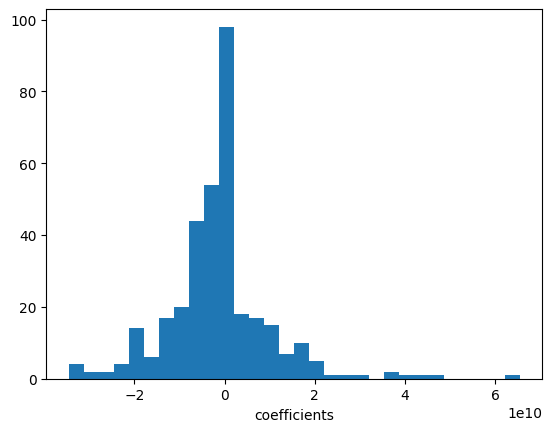

In [9]:
plt.hist(lr.coef_, bins=30)
plt.xlabel("coefficients")
plt.show()

__Grid search__

In [10]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error as MAE

# Variable to store the results
gs_results = []

# Grid search
for alpha in np.logspace(-4, 8, num=50):
    # Create and fit ridge regression
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_tr_rescaled, y_tr)

    # Save model and its performance on train/validation sets
    gs_results.append(
        {
            "alpha": alpha,
            "train_mse": MSE(y_tr, ridge.predict(X_tr_rescaled)),
            "train_mae": MAE(10 ** y_tr, 10 ** ridge.predict(X_tr_rescaled)),
            "validation_mse": MSE(y_val, ridge.predict(X_val_rescaled)),
            "validation_mae": MAE(10 ** y_val, 10 ** ridge.predict(X_val_rescaled)),
        }
    )

In [11]:
# Convert results to DataFrame
gs_results = pd.DataFrame(gs_results)
gs_results.head()

,alpha,train_mse,train_mae,validation_mse,validation_mae
0,0.000100,0.001412,11141.880175,0.006007,17811.906640
1,0.000176,0.001412,11141.880238,0.006007,17811.903896
2,0.000309,0.001412,11141.880348,0.006007,17811.899070
3,0.000543,0.001412,11141.880543,0.006007,17811.890590
4,0.000954,0.001412,11141.880884,0.006007,17811.875683


__Validation curves__

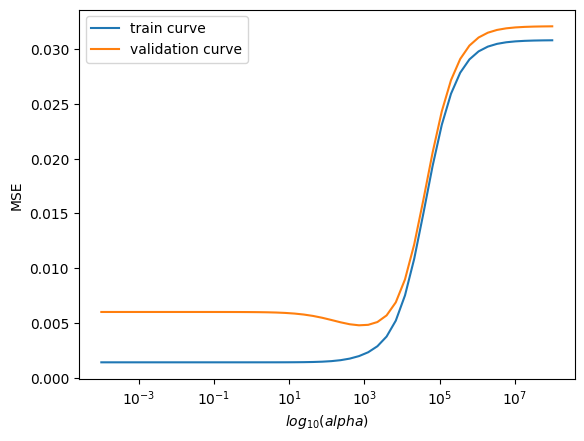

In [12]:
# Plot the validation curves
plt.semilogx(gs_results["alpha"], gs_results["train_mse"], label="train curve")
plt.semilogx(
    gs_results["alpha"], gs_results["validation_mse"], label="validation curve"
)
plt.xlabel("$log_{10}(alpha)$")
plt.ylabel("MSE")
plt.legend()
plt.show()

There are a few things to observe about this result.
- The optimal range of alpha values seems to be around 10e3, where we get the best validation score, i.e. the smallest generalization error.
- The model starts overfitting when alpha is smaller than 10e2 as the training score improves but we create a larger gap to the validation score.
- The models starts underfitting when alpha is larger than 10e4 as training and validation scores agree but the model performs worse than for other alpha values.


In [13]:
# Fit a model with a very strong regularization
strong_ridge = Ridge(alpha=10 ** 10)
strong_ridge.fit(X_tr_rescaled, y_tr)

print("Largest coefficient: {:.1e}".format(np.max(np.abs(strong_ridge.coef_))))
print("Intercept: {:.2f}".format(strong_ridge.intercept_))

Largest coefficient: 1.8e-08
Intercept: 5.23


In [14]:
print("Mean target value: {:.2f}".format(np.mean(y_tr)))

Mean target value: 5.23


__Introduction to cross-validation__

It’s often a good idea to test the robustness of our model by collecting the scores on different train/validation splits and calculating the average score. This is called cross-validation.

In [15]:
# Fit/validate N models
gs_results = []
for run_idx in range(10):

    # Split into train/validation sets
    X_tr, X_val, y_tr, y_val = train_test_split(
        X, y, test_size=0.5, random_state=run_idx
    )

    # Standardize features
    X_tr_rescaled = scaler.fit_transform(X_tr)
    X_val_rescaled = scaler.transform(X_val)

    # Grid search
    for alpha in np.logspace(1, 4, num=20):
        # Create and fit ridge regression
        ridge = Ridge(alpha=alpha)
        ridge.fit(X_tr_rescaled, y_tr)

        # Save model and its performance on train/validation sets
        gs_results.append(
            {
                "model": ridge,
                "alpha": alpha,
                "run_idx": run_idx,
                "train_mse": MSE(y_tr, ridge.predict(X_tr_rescaled)),
                "train_mae": MAE(10 ** y_tr, 10 ** ridge.predict(X_tr_rescaled)),
                "validation_mse": MSE(y_val, ridge.predict(X_val_rescaled)),
                "validation_mae": MAE(10 ** y_val, 10 ** ridge.predict(X_val_rescaled)),
            }
        )

In [16]:
# Convert results to DataFrame
gs_results = pd.DataFrame(gs_results)
gs_results.head()

,model,alpha,run_idx,train_mse,train_mae,validation_mse,validation_mae
0,Ridge(alpha=10.0),10.000000,0,0.001417,11146.062950,0.005899,17482.902923
1,Ridge(alpha=14.38449888287663),14.384499,0,0.001420,11157.081106,0.005857,17368.255688
2,Ridge(alpha=20.6913808111479),20.691381,0,0.001425,11173.069276,0.005803,17230.319702
3,Ridge(alpha=29.76351441631318),29.763514,0,0.001432,11195.867713,0.005734,17064.263120
4,Ridge(alpha=42.81332398719393),42.813324,0,0.001443,11230.620768,0.005648,16869.033792


In [17]:
# Group results by alpha value
gb_alpha = gs_results.groupby("alpha")

# Compute train/validation mean scores with std
mean_tr = gb_alpha.train_mse.mean()
mean_val = gb_alpha.validation_mse.mean()
std_tr = gb_alpha.train_mse.std()
std_val = gb_alpha.validation_mse.std()
alphas = mean_tr.index.values

# Get entry with the best mean validation MSE
best_alpha = mean_val.idxmin()
best_result = gb_alpha.get_group(best_alpha)

# Print the details
print("Best alpha: {:.1e}".format(best_alpha))
print("Validation MSE: {:.4f}".format(best_result.validation_mse.mean()))
print("Validation MAE: {:,.0f}$".format(best_result.validation_mae.mean()))

Best alpha: 5.5e+02
Validation MSE: 0.0038
Validation MAE: 15,699$


Note that we also computed the standard deviation for the different alpha values. This tells us how much the scores vary around the mean, i.e. how robust our model is. We can now include this information in the plot with the validation curves.

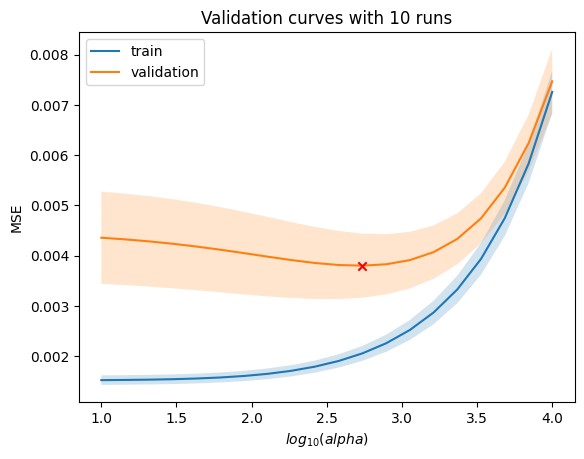

In [18]:
# Plot mean scores
plt.plot(np.log10(alphas), mean_tr, label="train")
plt.plot(np.log10(alphas), mean_val, label="validation")

# Quantify variance with ±std curves
plt.fill_between(np.log10(alphas), mean_tr - std_tr, mean_tr + std_tr, alpha=0.2)
plt.fill_between(np.log10(alphas), mean_val - std_val, mean_val + std_val, alpha=0.2)

# Add marker for best score
plt.scatter(np.log10(best_alpha), mean_val.min(), marker="x", c="red", zorder=10)

plt.title("Validation curves with {} runs".format(len(gs_results.groupby("run_idx"))))
plt.xlabel("$log_{10}(alpha)$")
plt.ylabel("MSE")
plt.legend()
plt.show()

# 6. Exercise - Ridge regression

Use the minimal preprocessing that we saw in the last unit: one-hot encoding for all non-numerical variables, and replace missing entries with the median value.

__Solution - Basic feature engineering for the house prices data__


> **Exercise**: (A) load the house prices data from `c3_house-prices.csv` (B) plot the distribution of the continuous variables using histograms: you should see that many have a skewed one (C) create a `preprocess(df)` function which performs (C.1) one-hot encoding (C.2) fill missing values (C.3) apply a **log-transform** to every continuous feature and (C.4) add their **polynomial features** of degree 2, 3 and 0.5 (square root). Finally (D) create the X/y numpy arrays - use the `np.log10()` of the sale price as the target variable.

**Hint**: The logarithm of zero doesn't exist, so we have to make sure that there are no zero values in the continuous columns when applying the log-transform. To achieve this, we can use `np.log(x+1)` (or simply `np.log1p(x)` which is equivalent) which will leave zero values untransformed i.e. `log(1)=0`

In [19]:
import pandas as pd
import os

# (A) Load the data
data_df = pd.read_csv("c3_house-prices.csv")
data_df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,484,528275070,60,RL,NaN,8795,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,236000
1,2586,535305120,20,RL,75.0,10170,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,155000
2,2289,923228250,160,RM,21.0,2001,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,75000
3,142,535152150,20,RL,70.0,10552,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,165500
4,2042,903475060,190,RM,60.0,10120,Pave,NaN,IR1,Bnk,...,0,NaN,MnPrv,NaN,0,1,2007,WD,Normal,122000


In [20]:
# Continuous features from the documentation
continuous = [
    "Lot Frontage",
    "Lot Area",
    "Mas Vnr Area",
    "BsmtFin SF 1",
    "BsmtFin SF 2",
    "Bsmt Unf SF",
    "Total Bsmt SF",
    "1st Flr SF",
    "2nd Flr SF",
    "Low Qual Fin SF",
    "Gr Liv Area",
    "Garage Area",
    "Wood Deck SF",
    "Open Porch SF",
    "Enclosed Porch",
    "3Ssn Porch",
    "Screen Porch",
    "Pool Area",
    "Misc Val",
]

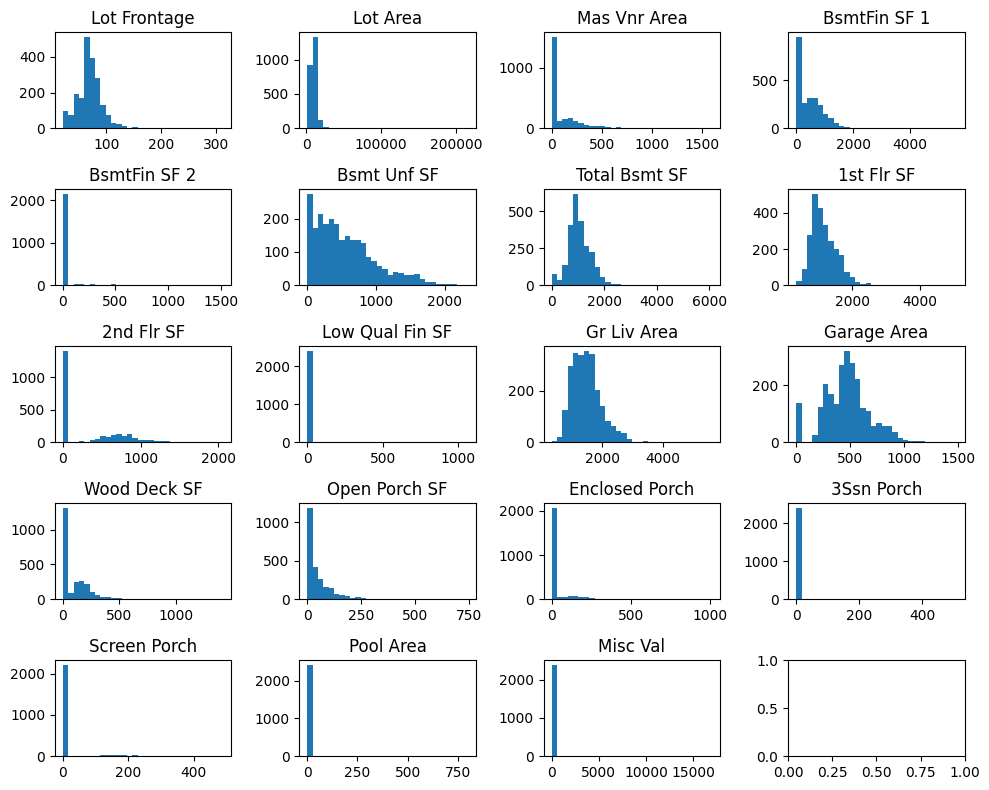

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

# (B) A quick look at the distribution of the variables
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(10, 8))

for c, ax in zip(continuous, axes.ravel()):
    ax.hist(data_df[c].dropna(), bins=30)
    ax.set_title(c)

plt.tight_layout()  # to avoid overlapping with the labels
plt.show()

In [22]:
import numpy as np

# (C) Preprocessing function
def preprocess(df):
    # Work on a copy
    df = df.copy()

    # (C.1) One-hot encoding
    df = pd.get_dummies(df, dummy_na=True)

    # (C.2) Fill missing values
    for c in df.columns:
        df[c] = df[c].fillna(df[c].median())

    # (C.3) Apply log-transform
    df[continuous] = np.log1p(df[continuous])

    # (C.4) Add polynomial features
    for c in continuous:
        for d in [0.5, 2, 3]:
            name = "{}**{}".format(c, d)
            df[name] = df[c] ** d

    return df


preprocessed_df = preprocess(data_df)
preprocessed_df.head()

/tmp/ipykernel_1038/3363884068.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[name] = df[c] ** d
/tmp/ipykernel_1038/3363884068.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[name] = df[c] ** d
/tmp/ipykernel_1038/3363884068.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[na

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,3Ssn Porch**3,Screen Porch**0.5,Screen Porch**2,Screen Porch**3,Pool Area**0.5,Pool Area**2,Pool Area**3,Misc Val**0.5,Misc Val**2,Misc Val**3
0,484,528275070,60,4.234107,9.082052,7,5,2000,2000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2586,535305120,20,4.330733,9.227296,6,6,1951,1951,6.259581,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2289,923228250,160,3.091042,7.601902,4,5,1970,1970,4.394449,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,142,535152150,20,4.262680,9.264165,5,5,1959,1959,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2042,903475060,190,4.110874,9.222368,7,4,1910,1950,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# (D) Create X, y
X = preprocessed_df.drop("SalePrice", axis=1).values
y = np.log10(preprocessed_df.SalePrice).values

__Solution - Tune Ridge regression__

> **Exercise**: Fit a ridge regression model and tune its alpha value using grid search. Use the train/validation set methodology with a 50/50 split. Print the optimal alpha value and the validation MSE/MAE scores.

**Hint**: Don't forget to standardize the input data.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split into train/validation sets
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.5, random_state=0)

# Standardize features
scaler = StandardScaler()
X_tr_rescaled = scaler.fit_transform(X_tr)
X_val_rescaled = scaler.transform(X_val)

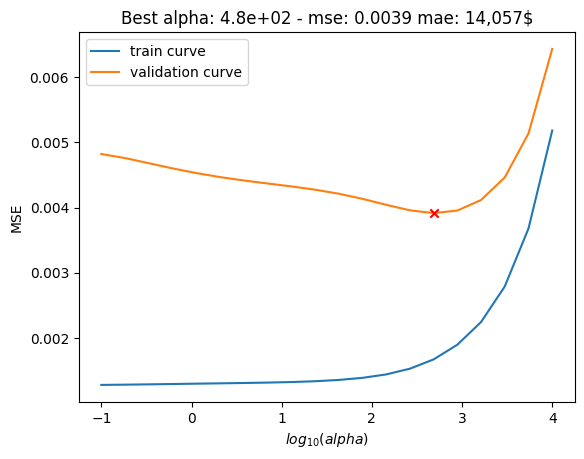

In [25]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.linear_model import Ridge

# Variable to store the results
gs_results = []

# Grid search
for alpha in np.logspace(-1, 4, num=20):
    # Create and fit ridge regression
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_tr_rescaled, y_tr)

    # Save model and its performance on train/validation sets
    gs_results.append(
        {
            "model": ridge,
            "alpha": alpha,
            "train_mse": MSE(y_tr, ridge.predict(X_tr_rescaled)),
            "train_mae": MAE(10 ** y_tr, 10 ** ridge.predict(X_tr_rescaled)),
            "validation_mse": MSE(y_val, ridge.predict(X_val_rescaled)),
            "validation_mae": MAE(10 ** y_val, 10 ** ridge.predict(X_val_rescaled)),
        }
    )

# Convert results to DataFrame
gs_results = pd.DataFrame(gs_results)

# Plot the validation curves
plt.plot(np.log10(gs_results["alpha"]), gs_results["train_mse"], label="train curve")
plt.plot(np.log10(gs_results["alpha"]), gs_results["validation_mse"], label="validation curve")

# Mark best alpha value
best_result = gs_results.loc[gs_results.validation_mse.idxmin()]
plt.scatter(
    np.log10(best_result.alpha), best_result.validation_mse, marker="x", c="red", zorder=10
)
plt.title(
    "Best alpha: {:.1e} - mse: {:.4f} mae: {:,.0f}$".format(
        best_result.alpha, best_result.validation_mse, best_result.validation_mae
    )
)

plt.xlabel("$log_{10}(alpha)$")
plt.ylabel("MSE")
plt.legend()
plt.show()

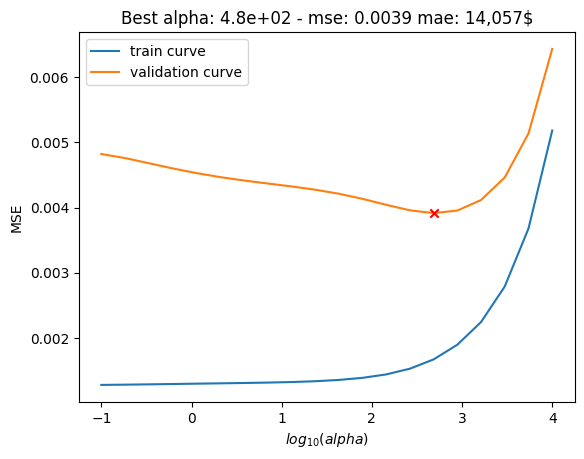

In [26]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.linear_model import Ridge

# Variable to store the results
gs_results = []

# Grid search
for alpha in np.logspace(-1, 4, num=20):
    # Create and fit ridge regression
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_tr_rescaled, y_tr)

    # Save model and its performance on train/validation sets
    gs_results.append(
        {
            "model": ridge,
            "alpha": alpha,
            "train_mse": MSE(y_tr, ridge.predict(X_tr_rescaled)),
            "train_mae": MAE(10 ** y_tr, 10 ** ridge.predict(X_tr_rescaled)),
            "validation_mse": MSE(y_val, ridge.predict(X_val_rescaled)),
            "validation_mae": MAE(10 ** y_val, 10 ** ridge.predict(X_val_rescaled)),
        }
    )

# Convert results to DataFrame
gs_results = pd.DataFrame(gs_results)

# Plot the validation curves
plt.plot(np.log10(gs_results["alpha"]), gs_results["train_mse"], label="train curve")
plt.plot(np.log10(gs_results["alpha"]), gs_results["validation_mse"], label="validation curve")

# Mark best alpha value
best_result = gs_results.loc[gs_results.validation_mse.idxmin()]
plt.scatter(
    np.log10(best_result.alpha), best_result.validation_mse, marker="x", c="red", zorder=10
)
plt.title(
    "Best alpha: {:.1e} - mse: {:.4f} mae: {:,.0f}$".format(
        best_result.alpha, best_result.validation_mse, best_result.validation_mae
    )
)

plt.xlabel("$log_{10}(alpha)$")
plt.ylabel("MSE")
plt.legend()
plt.show()

# 8. Post-modeling analysis for regressors

In post-modeling analysis we examine the errors of our models, the difference between our predictions and true values, in order to get a better understanding of the strength and weaknesses of our models. This information can then give us ideas on how to improve our model.

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_pred = pd.read_csv("c3_model_predictions.csv")
df_pred.head()

,y_true,y_pred_lr,y_pred_hub,y_pred_dt,y_pred_rf,y_pred_knn,species
0,3250.0,3186.613981,3190.888090,3175.0,3195.50,3273.112286,Adelie
1,4875.0,4929.282706,4928.207019,4400.0,4872.25,4971.757801,Gentoo
2,4000.0,4061.310494,4043.939336,4250.0,4177.00,4124.402577,Adelie
3,3675.0,3519.998625,3549.329730,3950.0,3759.75,3507.845984,Chinstrap
4,4050.0,3934.843283,3910.346362,3900.0,3939.75,4001.459647,Adelie


## Analysis of individual models

__Histograms and KDE plots__

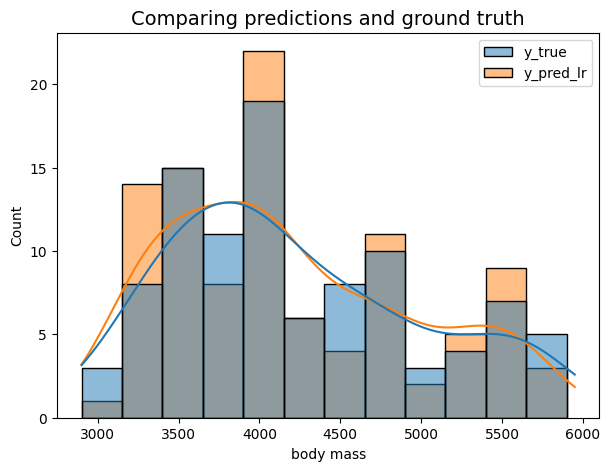

In [32]:
# Filter data
y_true = df_pred.y_true
y_pred_lr = df_pred.y_pred_lr

# Setup bins of width 250g
y_min, y_max = y_true.min(), y_true.max()
bins = np.arange(y_min, y_max, 250)

# Plot histogram
plt.figure(figsize=(7, 5))
sns.histplot(data=df_pred.loc[:, ["y_true", "y_pred_lr"]], bins=bins, kde=True)

# Add title and labels
plt.title("Comparing predictions and ground truth", fontsize=14)
plt.xlabel("body mass")
plt.show()

__Scatterplot__

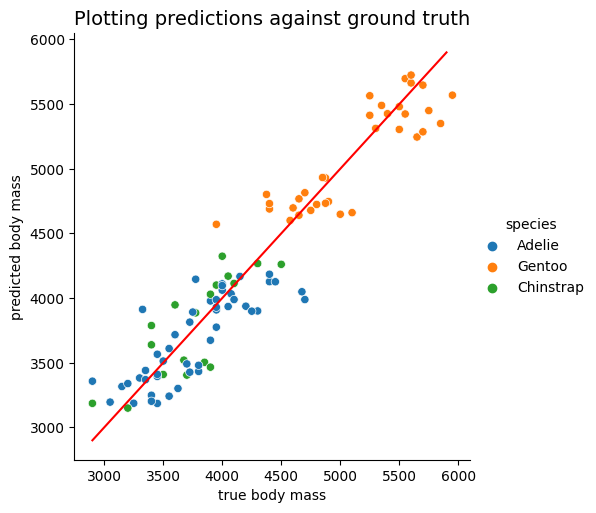

In [33]:
# Plot scatter plot
sns.relplot(x=y_true, y=y_pred_lr, hue=df_pred.species, height=5)

# Plot diagonal line
line_x = np.arange(y_min, y_max, 100)
plt.plot(line_x, line_x, c="r")

# Add title and labels
plt.title("Plotting predictions against ground truth", fontsize=14)
plt.xlabel("true body mass")
plt.ylabel("predicted body mass")
plt.show()

__Analyzing the errors__

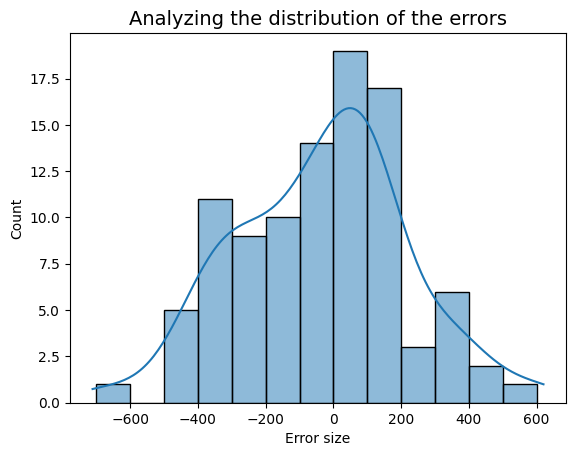

In [34]:
# Calculate errors
errors = y_pred_lr - y_true

# Plot histogram with bins of 100g
sns.histplot(x=errors, bins=np.arange(-700, 700, 100), kde=True)
plt.title("Analyzing the distribution of the errors", fontsize=14)
plt.xlabel("Error size")
plt.show()

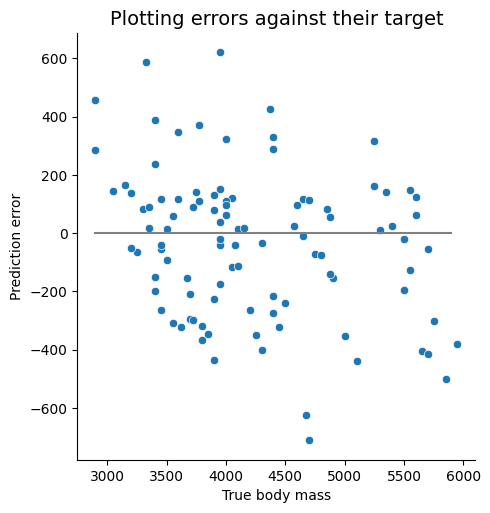

In [35]:
# Plot scatter plot
sns.relplot(x=y_true, y=errors, height=5)

# For horizontal line
y_min, y_max = y_true.min(), y_true.max()
line_x = np.arange(y_min, y_max, 100)
plt.plot(line_x, 0 * line_x, c="gray")

# Add title and labels
plt.title("Plotting errors against their target", fontsize=14)
plt.xlabel("True body mass")
plt.ylabel("Prediction error")
plt.show()

## Comparison of multiple models against each other

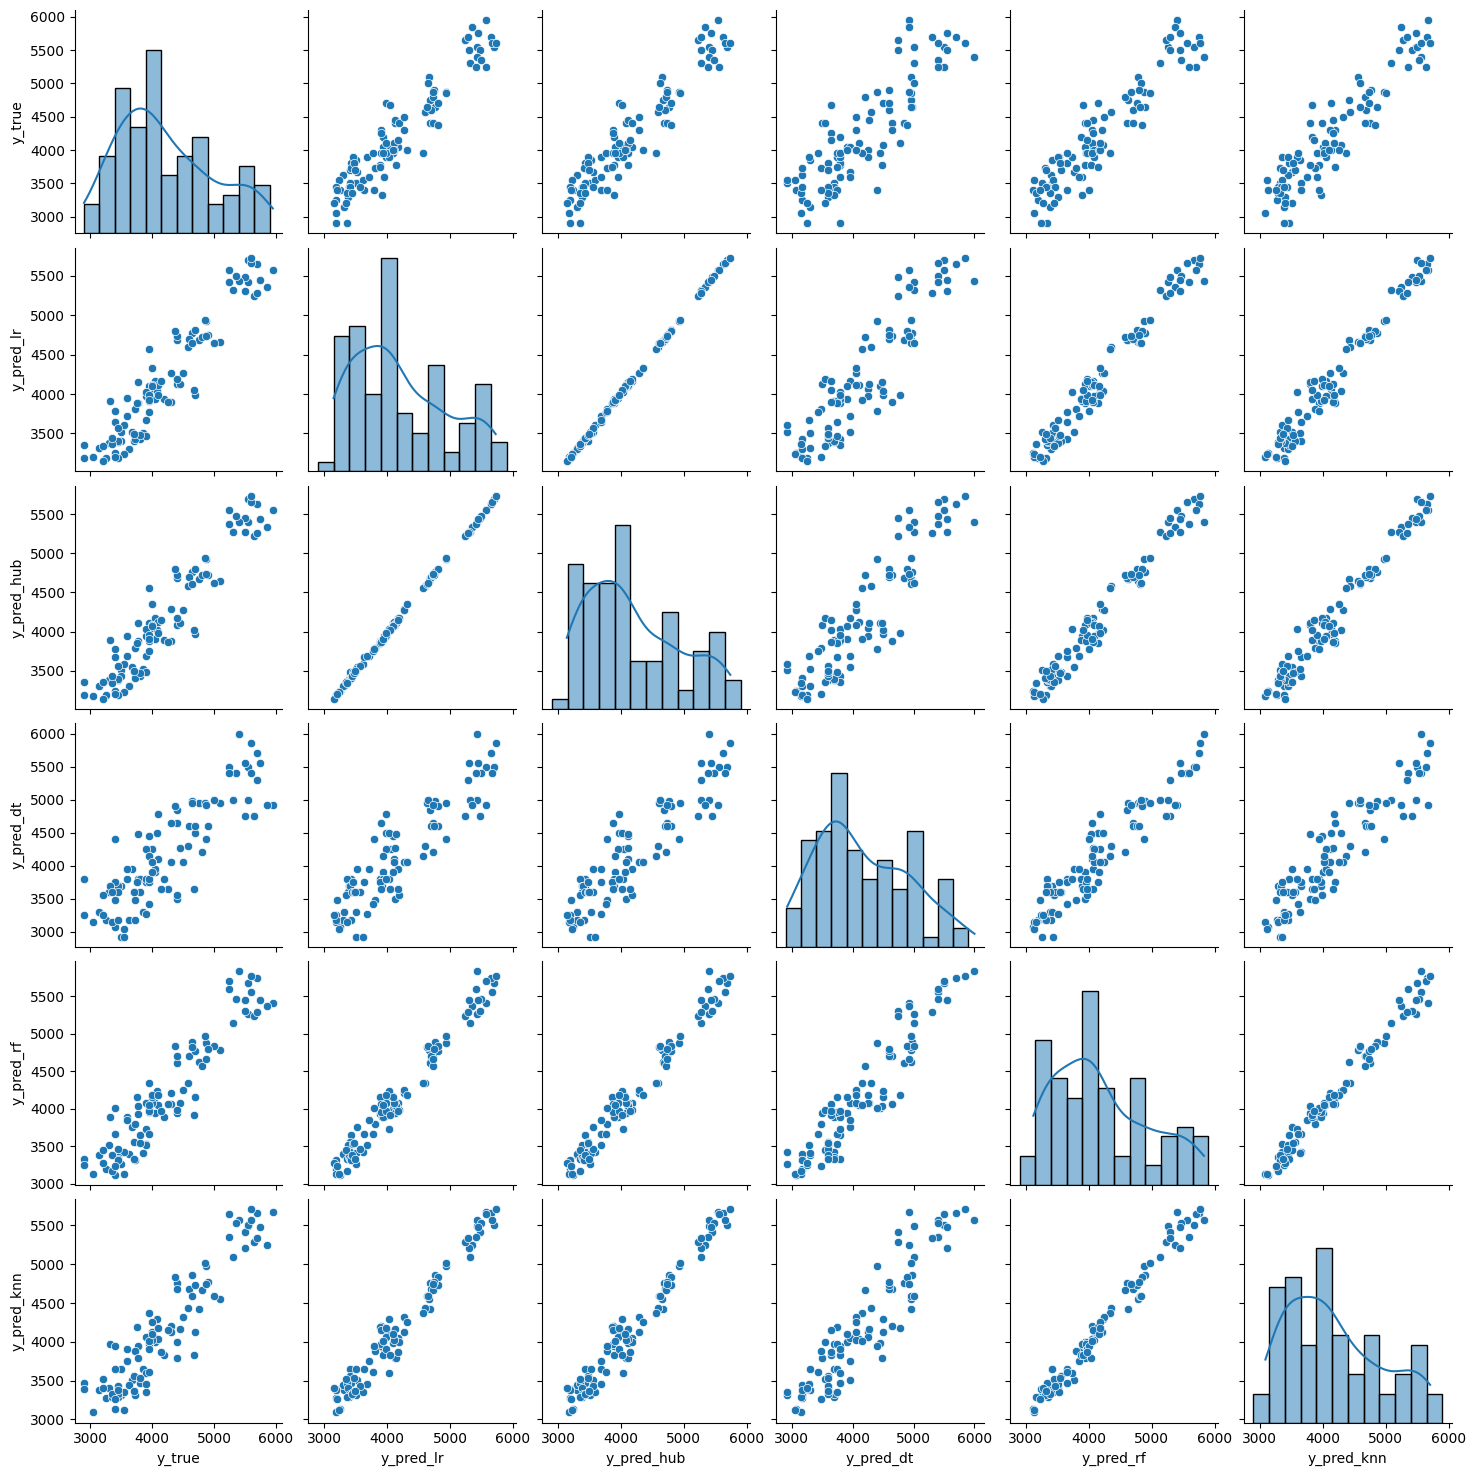

In [36]:
# Setup bins of width 250g
bins = np.arange(y_min, y_max, 250)
sns.pairplot(
    df_pred,
    diag_kws={"bins": bins, "kde": True},
)
plt.show()

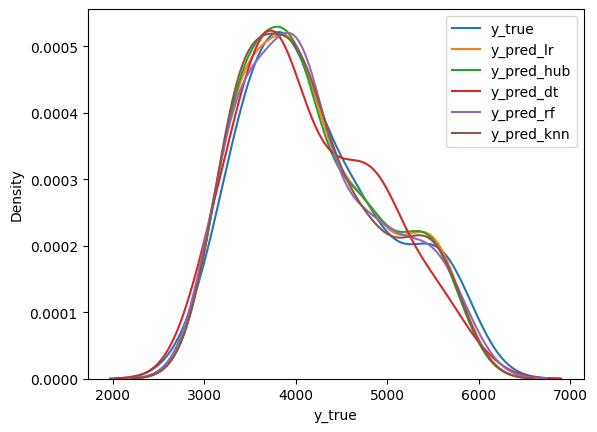

In [37]:
for c in df_pred.columns[df_pred.columns.str.contains("y_")]:
    sns.kdeplot(df_pred[c], label=c)
plt.legend()
plt.show()

__Comparing model predictions sample by sample__

In [38]:
df_pred2 = df_pred.sort_values("y_true").reset_index(drop=False)
# We retain the original index so we can easily identify the original samples whenever necessary.

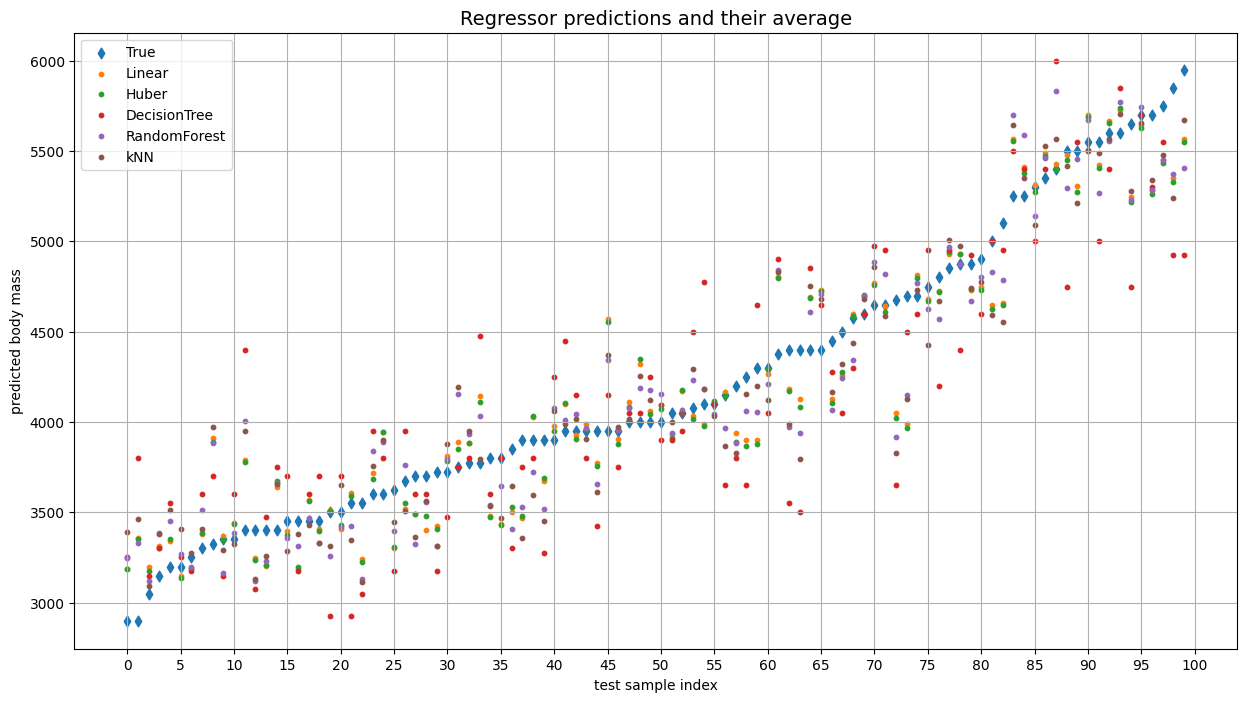

In [39]:
# Setup
plt.figure(figsize=(15, 8))
ind = df_pred.index
s = 10

# Plots
plt.scatter(ind, df_pred2.y_true, color="C0", marker="d", s=3 * s, label="True")
plt.scatter(ind, df_pred2.y_pred_lr, color="C1", s=s, label="Linear")
plt.scatter(ind, df_pred2.y_pred_hub, color="C2", s=s, label="Huber")
plt.scatter(ind, df_pred2.y_pred_dt, color="C3", s=s, label="DecisionTree")
plt.scatter(ind, df_pred2.y_pred_rf, color="C4", s=s, label="RandomForest")
plt.scatter(ind, df_pred2.y_pred_knn, color="C5", s=s, label="kNN")

# Add title, labels, etc.
plt.title("Regressor predictions and their average", fontsize=14)
plt.xlabel("test sample index")
plt.ylabel("predicted body mass")

plt.grid(True)
plt.xticks(ticks=np.arange(0, 101, 5))
plt.legend(loc="best")

plt.show()

In [40]:
# Selecting the 4 best models
df_best_4 = df_pred2.loc[
    :, ["y_pred_lr", "y_pred_hub", "y_pred_rf", "y_pred_knn"]
].copy()

# Calculating the prediction errors and calculating their stats per sample
df_best_4_errors = df_best_4.subtract(df_pred2.y_true, axis=0)
df_best_4_avg_errors = df_best_4_errors.mean(axis=1)
df_best_4_avg_errors.name = "avg error"
df_best_4_std_errors = df_best_4_errors.std(axis=1)
df_best_4_std_errors.name = "std error"

The samples with the best average prediction

In [41]:
np.abs(df_best_4_avg_errors).sort_values().to_frame().head()

,avg error
43,4.430238
92,9.909463
71,14.755152
54,18.176192
46,21.680598


The samples with the strongest average underestimation

In [42]:
df_best_4_avg_errors.sort_values().to_frame().head()

,avg error
72,-721.508580
73,-640.974457
98,-526.396622
37,-441.309766
82,-437.330235


The samples with the strongest average overestimation

In [43]:
df_best_4_avg_errors.sort_values(ascending=False).to_frame().head()

,avg error
8,589.645929
45,509.021195
11,480.330710
1,475.870630
61,442.219984


The samples with the best agreement in their predictions

In [44]:
df_best_4_std_errors.sort_values().to_frame().head()

,std error
69,9.338461
14,14.949520
97,18.366187
61,20.777373
65,22.653241


The samples with the worst agreement in their predictions

In [45]:
df_best_4_std_errors.sort_values(ascending=False).to_frame().head()

,std error
38,220.142656
87,196.083355
31,175.323321
33,158.690470
59,151.524435


__And the winner is?__

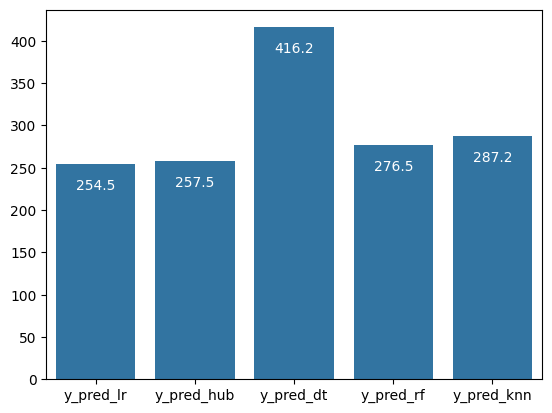

In [46]:
from sklearn.metrics import mean_squared_error

# Get the column names
trained_models = list(df_pred)[1:-1]

# Calculate the RMSE per model
rmse_list = []
for model in trained_models:
    model_rmse = mean_squared_error(df_pred["y_true"], df_pred[model], squared=False)
    # Note squared=False returns RMSE instead of MSE
    rmse_list.append(np.round(model_rmse, 1))

# The plot
sns.barplot(x=trained_models, y=rmse_list, color="C0")
# Add the RMSE values as labels to each bar
for i in range(len(rmse_list)):
    plt.text(
        x=i,  # the horizontal position, i.e. the ith bar
        y=rmse_list[i] - 30,  # the vertical position
        s=rmse_list[i],  # the text
        color="white",
        horizontalalignment="center",
    )
plt.show()